In [23]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [24]:
df_sales = pd.read_csv("../../data/Sales_Multiseries_training.csv")

In [25]:
df_sales.head()

,Store,Date,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,Holiday,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Louisville,07/01/12,76819.40,20100,42,1.03,327,9.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,0.5,NaN,0.02
1,Louisville,07/02/12,78963.86,20100,21,0.41,293,8.65,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
2,Louisville,07/03/12,74824.71,20100,26,0.31,356,8.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
3,Louisville,07/04/12,78523.92,20100,33,0.83,350,10.08,July In Store Credit Card Signup Discount; In ...,0,0,Yes,No,0.000047,NaN,NaN,NaN
4,Louisville,07/05/12,76445.90,20100,38,0.51,299,9.80,July In Store Credit Card Signup Discount; ID5...,0,0,No,No,0.000047,NaN,NaN,NaN


In [26]:
df_sales.describe()

,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Near_Xmas,Near_BlackFriday,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
count,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000,7130.000000,7140.000000,7140.000000,7140.000000,80.00000,1020.000000,240.000000
mean,78534.278832,16910.000000,35.048739,0.769146,269.444258,11.711823,2.691877,0.179272,0.065318,1.76250,-590.686275,0.019447
std,27445.616100,1927.023634,19.238847,0.469912,226.393313,3.861841,6.958566,0.965183,0.033369,1.84661,5970.650044,0.025387
min,0.000000,13400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001119,-1.20000,-26000.000000,-0.034766
25%,61759.032500,15700.000000,23.000000,0.440000,154.000000,8.940000,0.000000,0.000000,0.047338,0.40000,-4250.000000,0.009091
50%,70776.860000,16750.000000,31.000000,0.680000,207.000000,10.940000,0.000000,0.000000,0.058358,1.80000,-250.000000,0.020241
75%,85319.047500,18800.000000,41.000000,1.000000,287.000000,13.717500,0.000000,0.000000,0.075387,3.32500,3000.000000,0.028015
max,324414.440000,20100.000000,214.000000,3.090000,2268.000000,31.070000,31.000000,8.000000,0.163078,4.00000,16500.000000,0.073502


In [27]:
df_sales.Date = pd.to_datetime(df_sales.Date, format='%m/%d/%y')
df_sales['year'] = pd.DatetimeIndex(df_sales.Date).year
df_sales['month'] = pd.DatetimeIndex(df_sales.Date).month
df_sales['day'] = pd.DatetimeIndex(df_sales.Date).day
df_sales['dayOfWeek'] = pd.DatetimeIndex(df_sales.Date).dayofweek
df_sales['quarter'] = pd.DatetimeIndex(df_sales.Date).quarter

In [28]:
df_sales.Date = pd.to_datetime(df_sales.Date, format='%m/%d/%y')

In [29]:
df_sales = df_sales.sort_values('Date')

In [9]:
df_sales['Date'].min(),df_sales['Date'].max()

(Timestamp('2012-07-01 00:00:00'), Timestamp('2014-06-14 00:00:00'))

In [30]:
df_sales = df_sales.sort_values('Date')
df_sales = df_sales.set_index('Date')

In [33]:
df_sales.head()

,Store,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,...,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI,year,month,day,dayOfWeek,quarter
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-01,Louisville,76819.40,20100,42,1.03,327,9.96,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
2012-07-01,Detroit,63607.02,16600,34,1.07,271,11.21,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
2012-07-01,Portland,64430.14,16900,36,1.08,275,11.16,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
2012-07-01,Columbus,61910.23,16200,31,0.98,264,10.14,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
2012-07-01,Philadelphia,60000.53,15700,27,1.09,256,10.37,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3


In [35]:
df_sales.columns

Index(['Store', 'Sales', 'Store_Size', 'Num_Employees', 'Returns_Pct',
       'Num_Customers', 'Pct_On_Sale', 'Marketing', 'Near_Xmas',
       'Near_BlackFriday', 'Holiday', 'DestinationEvent', 'Pct_Promotional',
       'Econ_ChangeGDP', 'EconJobsChange', 'AnnualizedCPI', 'year', 'month',
       'day', 'dayOfWeek', 'quarter'],
      dtype='object')

In [38]:
# resample with month start frequency

y = df_sales['Sales'].resample('MS').mean()

In [39]:
y

Date
2012-07-01     66791.016129
2012-08-01     66653.123258
2012-09-01     69412.790800
2012-10-01     76844.969548
2012-11-01    104339.847833
2012-12-01    119779.813806
2013-01-01     84442.794032
2013-02-01     69758.774250
2013-03-01     69675.870323
2013-04-01     68574.455233
2013-05-01     78263.281226
2013-06-01     71931.395733
2013-07-01     70302.190774
2013-08-01     68966.263710
2013-09-01     71529.901500
2013-10-01     75740.714065
2013-11-01    110094.519633
2013-12-01    119789.193065
2014-01-01     79264.339129
2014-02-01     62639.529286
2014-03-01     64270.607968
2014-04-01     68263.136633
2014-05-01     73342.028129
2014-06-01     64573.486143
Freq: MS, Name: Sales, dtype: float64

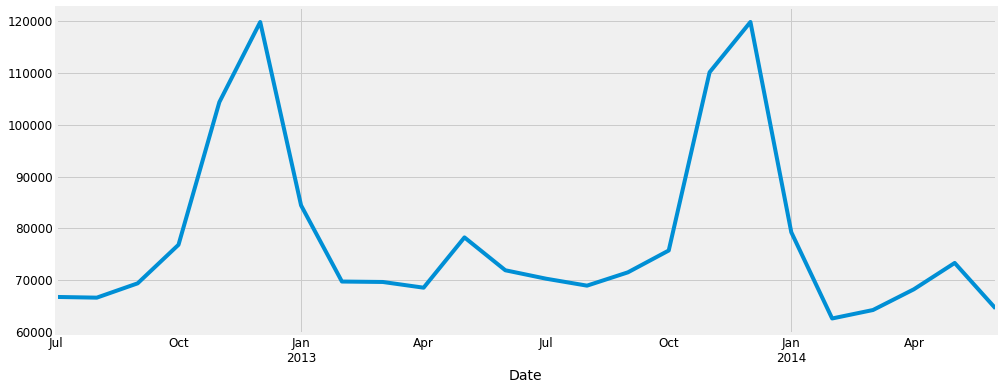

In [13]:
y.plot(figsize=(15, 6))
plt.show()

In [40]:
df_sales2 = df_sales.groupby(['quarter'])['Sales'].count().reset_index()
df_sales2

,quarter,Sales
0,1,1800
1,2,1660
2,3,1840
3,4,1840


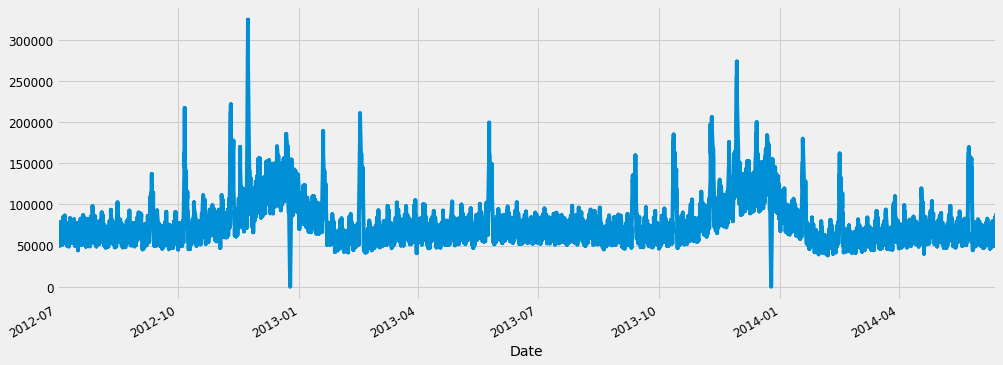

In [41]:
d2=df_sales['Sales']
d2.plot(figsize=(15, 6))
plt.show()

In [17]:
d1=df_sales[df_sales.Store == "Savannah"]

In [18]:
d3= d1.groupby(['Date'])['Sales'].mean()

In [45]:
d1.head()

,Store,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,...,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI,year,month,day,dayOfWeek,quarter
Date,,,,,,,,,,,,,,,,,,,,,
2012-07-01,Savannah,73917.95,19300,40,1.10,315,11.09,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,0.5,NaN,0.02,2012,7,1,6,3
2012-07-02,Savannah,75981.42,19300,21,0.44,282,9.64,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,NaN,NaN,NaN,2012,7,2,0,3
2012-07-03,Savannah,71998.60,19300,19,0.33,343,9.98,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,NaN,NaN,NaN,2012,7,3,1,3
2012-07-04,Savannah,75558.09,19300,33,0.89,337,11.23,July In Store Credit Card Signup Discount; In ...,0,0,...,No,0.000047,NaN,NaN,NaN,2012,7,4,2,3
2012-07-05,Savannah,73558.56,19300,32,0.54,287,10.92,July In Store Credit Card Signup Discount; ID5...,0,0,...,No,0.000047,NaN,NaN,NaN,2012,7,5,3,3


In [47]:
type(d3)

pandas.core.series.Series

In [48]:
# d4=d1['Sales'].resample('MS').mean()
# d4

# SERIES DECOMPOSITION

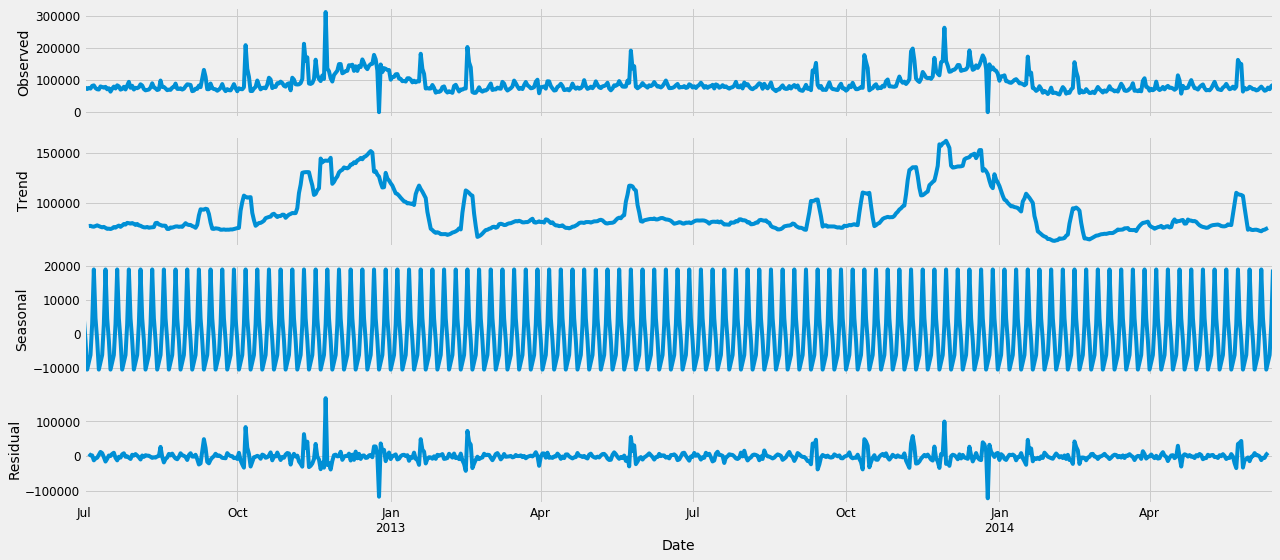

In [55]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(d1["Sales"], model="additive", filt=None, freq=None)
fig = decomposition.plot()
plt.show()

In [21]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(d3, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=16249.405, BIC=16272.167, Fit time=4.010 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=16704.189, BIC=16713.294, Fit time=0.065 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=16481.826, BIC=16500.036, Fit time=1.021 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=16124.045, BIC=16142.255, Fit time=5.758 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=16125.228, BIC=16147.990, Fit time=7.755 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=16597.356, BIC=16611.014, Fit time=0.226 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=16283.008, BIC=16305.770, Fit time=8.219 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=16287.123, BIC=16314.438, Fit time=7.902 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=16218.370, BIC=16232.027, Fit time=4.723 seconds
Fit ARIMA:

In [56]:
train = d3.loc['2012-07-01':'2014-01-01']
test = d3.loc['2014-01-01':]
#train, test = df_sales[df_sales.Date < '2014-01-01'], df_sales[df_sales.Date >= '2014-01-01']


In [57]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [58]:
future_forecast = stepwise_model.predict(n_periods=165)

In [59]:
future_forecast

array([120304.54373919, 119815.31951235, 128156.21989729, 127409.96483473,
       121371.41198111, 121816.81734034, 120403.03886398, 119299.28891795,
       121236.55827265, 119633.58905074, 115699.56614202, 111472.11118384,
       118848.31463025, 118344.88273364, 126671.5754488 , 125911.11271647,
       119858.35219307, 120289.54988254, 118861.5637364 , 117743.6061206 ,
       119666.66780553, 118049.49091385, 114101.26033535, 109859.5977074 ,
       117221.59348404, 116703.95391765, 125016.43896304, 124241.76856094,
       118174.80036777, 118591.79038746, 117149.59657156, 116017.43128598,
       117926.28530114, 116294.90073969, 112332.46249141, 108076.59219369,
       115424.38030056, 114892.5330644 , 123190.81044002, 122401.93236814,
       116320.7565052 , 116723.53885512, 115267.13736944, 114120.76441409,
       116015.41075948, 114369.81852825, 110393.17261021, 106123.09464272,
       113456.67507981, 112910.62017388, 121194.68987972, 120391.60413807,
       114296.22060536, 1

In [60]:
import plotly.plotly as ply
import cufflinks as cf
from plotly.plotly import plot_mpl
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).iplot()

In [61]:
pd.concat([y,future_forecast],axis=1).iplot()

In [62]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [63]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(d3,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:18362.581404605444
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:17665.672614862506
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:16594.857805785636
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16152.28204068049
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16597.11572556052
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16441.792161976326
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:16232.130653701766
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16153.539572510701
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:17891.207955035024
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:17489.733203659463
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16473.02589417848
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16004.873573342174
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:17436.217646764097
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:17371.39661729345
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16113.56707890764
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16006.869613825049
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16424.77545430167
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:16159.72829446307

In [64]:
mod = sm.tsa.statespace.SARIMAX(d3,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7126      0.023    -31.368      0.000      -0.757      -0.668
sigma2      1.168e+09   1.55e-12   7.55e+20      0.000    1.17e+09    1.17e+09


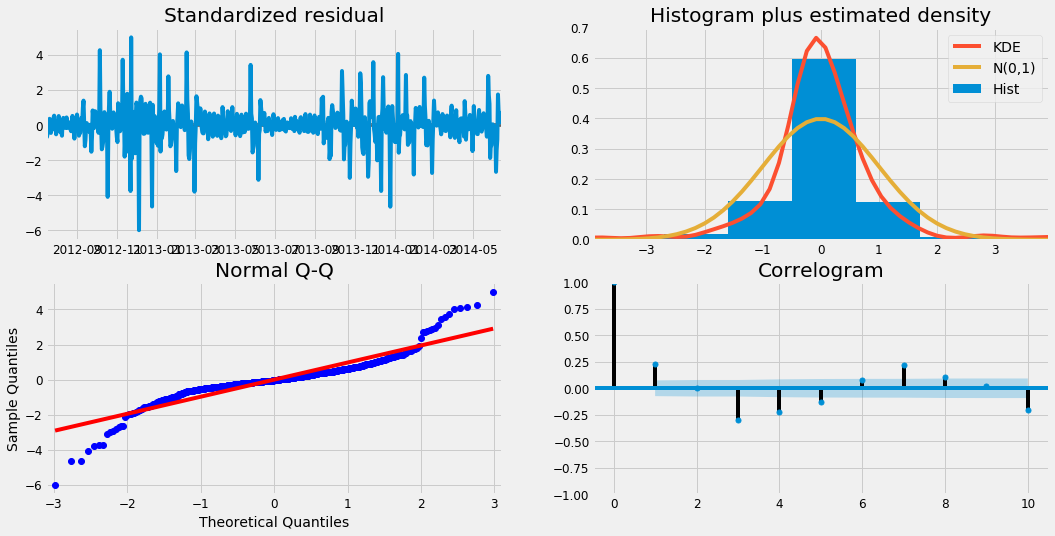

In [65]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# DAILY sales prediction 

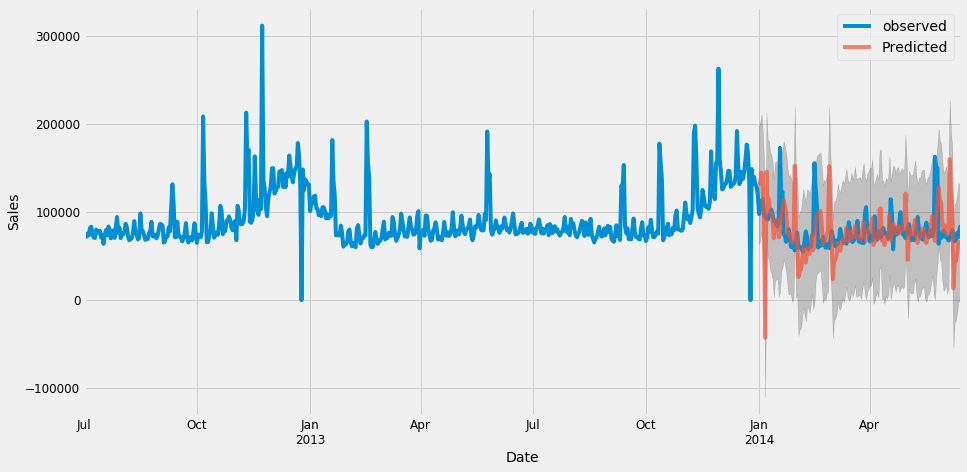

In [66]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = d3['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [67]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 597398196.8


# FORECAST

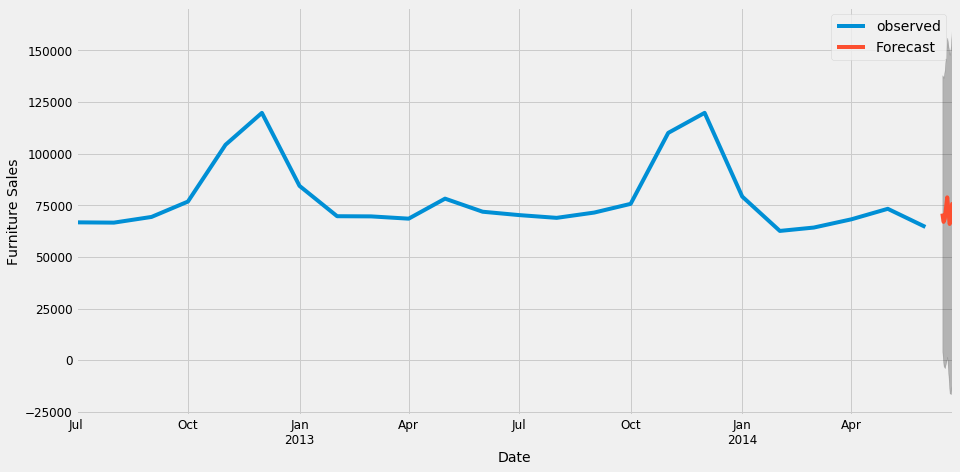

In [68]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()